In [1]:
# Import main libraries
import os
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Input data paths
DIR = os.path.abspath('')
IN_FOLDER = os.path.join(os.path.dirname(DIR), "in")

BREED_LABELS = os.path.join(IN_FOLDER, "breed_labels.csv")
COLOR_LABELS = os.path.join(IN_FOLDER, "color_labels.csv")
STATE_LABELS = os.path.join(IN_FOLDER, "state_labels.csv")

In [3]:
# Store the input data to DataFrames
breed_labels = pd.read_csv(BREED_LABELS)
color_labels = pd.read_csv(COLOR_LABELS)
state_labels = pd.read_csv(STATE_LABELS)

In [4]:
# breed_labels contains the breed names for both dogs (type=1) and cats (type=2)
breed_labels.iloc[np.r_[0:2, -2:0]]

,BreedID,Type,BreedName
0,1,1,Affenpinscher
1,2,1,Afghan Hound
305,305,2,Turkish Van
306,306,2,Tuxedo


In [5]:
# color_labels are the color names with their ids.
# It is the color of the pet's coat. Each pet has at most 3 colors.
# It will be used in the train/test.csv files
color_labels

,ColorID,ColorName
0,1,Black
1,2,Brown
2,3,Golden
3,4,Yellow
4,5,Cream
5,6,Gray
6,7,White


In [6]:
# state_labels are the 15 states of Malaysia
# The state where the pet is from is recorded in the train/test.csv files
state_labels

,StateID,StateName
0,41336,Johor
1,41325,Kedah
2,41367,Kelantan
3,41401,Kuala Lumpur
4,41415,Labuan
5,41324,Melaka
6,41332,Negeri Sembilan
7,41335,Pahang
8,41330,Perak
9,41380,Perlis


In [7]:
# Train and Test data sets
TRAIN = os.path.join(IN_FOLDER, "train", "train.csv")
TEST = os.path.join(IN_FOLDER, "test", "test.csv")

train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [8]:
for column in train:
    col = train[column]
    num_unique_values = col.nunique()

    # Column Name
    print("\nColumn Name: \t\t\t%s" % col.name)

    # Column Type + Min/Max
    if col.dtype == "int64":
        print("Min -> Max: \t\t\t%d -> %d" % (col.min(), col.max()))
    else:
        print("Column type: \t\t\t%s" % col.dtype)

    # Unique values + possible/example values
    print("Number of unique values: \t%d" % num_unique_values)
    if num_unique_values < 10:
        sorted_unique = col.unique()
        sorted_unique.sort()
        print("Possible values: \t\t%s" %
              " ".join(map(str, sorted_unique)))
    else:
        print("Example value: \t\t\t%s" % col.sample(1, axis=0).values[0])


Column Name: 			Type
Min -> Max: 			1 -> 2
Number of unique values: 	2
Possible values: 		1 2

Column Name: 			Name
Column type: 			object
Number of unique values: 	9060
Example value: 			Alti Grey

Column Name: 			Age
Min -> Max: 			0 -> 255
Number of unique values: 	106
Example value: 			36

Column Name: 			Breed1
Min -> Max: 			0 -> 307
Number of unique values: 	176
Example value: 			109

Column Name: 			Breed2
Min -> Max: 			0 -> 307
Number of unique values: 	135
Example value: 			292

Column Name: 			Gender
Min -> Max: 			1 -> 3
Number of unique values: 	3
Possible values: 		1 2 3

Column Name: 			Color1
Min -> Max: 			1 -> 7
Number of unique values: 	7
Possible values: 		1 2 3 4 5 6 7

Column Name: 			Color2
Min -> Max: 			0 -> 7
Number of unique values: 	7
Possible values: 		0 2 3 4 5 6 7

Column Name: 			Color3
Min -> Max: 			0 -> 7
Number of unique values: 	6
Possible values: 		0 3 4 5 6 7

Column Name: 			MaturitySize
Min -> Max: 			1 -> 4
Number of unique values: 	4
Possibl

## Visualization
- Let's have a look have a look at which states have the most pets.

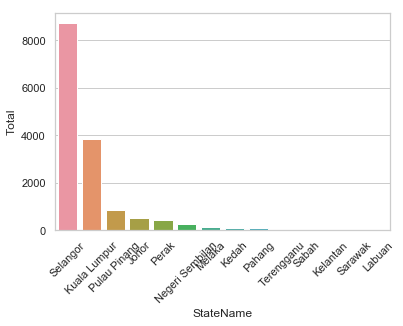

In [9]:
groupbyState = train[["State", "Type"]].groupby(["State"]).count().reset_index()
total_df = pd.merge(left=groupbyState, right=state_labels, how='left', left_on='State', right_on='StateID')
data = total_df[["Type", "StateName"]].rename(index=str, columns={ "Type": "Total" })

sns.set(style="whitegrid")
ax = sns.barplot(x="StateName", y="Total", data=data.sort_values(by=['Total'], ascending=False))
for item in ax.get_xticklabels():
    item.set_rotation(45)

This is in accordance with the size of the state, in terms of number of inhabitants.

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
Type             14993 non-null int64
Name             13736 non-null object
Age              14993 non-null int64
Breed1           14993 non-null int64
Breed2           14993 non-null int64
Gender           14993 non-null int64
Color1           14993 non-null int64
Color2           14993 non-null int64
Color3           14993 non-null int64
MaturitySize     14993 non-null int64
FurLength        14993 non-null int64
Vaccinated       14993 non-null int64
Dewormed         14993 non-null int64
Sterilized       14993 non-null int64
Health           14993 non-null int64
Quantity         14993 non-null int64
Fee              14993 non-null int64
State            14993 non-null int64
RescuerID        14993 non-null object
VideoAmt         14993 non-null int64
Description      14981 non-null object
PetID            14993 non-null object
PhotoAmt         14993 non-null float64
AdoptionSpe

In [11]:
train.describe()

,Type,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,AdoptionSpeed
count,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000,14993.000000
mean,1.457614,10.452078,265.272594,74.009738,1.776162,2.234176,3.222837,1.882012,1.862002,1.467485,1.731208,1.558727,1.914227,1.036617,1.576069,21.259988,41346.028347,0.056760,3.889215,2.516441
std,0.498217,18.155790,60.056818,123.011575,0.681592,1.745225,2.742562,2.984086,0.547959,0.599070,0.667649,0.695817,0.566172,0.199535,1.472477,78.414548,32.444153,0.346185,3.487810,1.177265
min,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,41324.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,265.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,2.000000,2.000000
50%,1.000000,3.000000,266.000000,0.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000,41326.000000,0.000000,3.000000,2.000000
75%,2.000000,12.000000,307.000000,179.000000,2.000000,3.000000,6.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,41401.000000,0.000000,5.000000,4.000000
max,2.000000,255.000000,307.000000,307.000000,3.000000,7.000000,7.000000,7.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,20.000000,3000.000000,41415.000000,8.000000,30.000000,4.000000


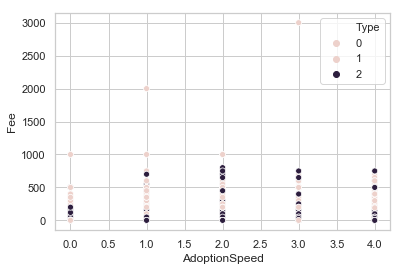

In [12]:
ax = sns.scatterplot(x="AdoptionSpeed", y="Fee", hue="Type", data=train)